In [97]:
import yfinance as yf
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [98]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-02 00:00:00-04:00,4241.009766,4290.669922,4241.009766,4282.370117,4454200000,0.0,0.0
2023-06-05 00:00:00-04:00,4282.990234,4299.279785,4266.819824,4273.790039,3813290000,0.0,0.0
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,0.0,0.0


<Axes: xlabel='Date'>

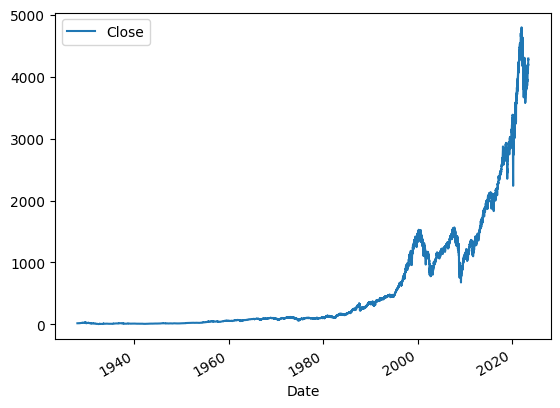

In [99]:
sp500.plot.line(y="Close", use_index = True)

In [100]:
# these columns are not needed, because we want to predict whether the stock
# price will go up or down 

del sp500['Dividends']
del sp500['Stock Splits']

In [101]:
# Next we will create another coulum which will be demonstrating tommorrows price
# this will be achived usuing shift and shift the price back to former day

sp500["tommorrow"] = sp500['Close'].shift(-1)

In [102]:
# Next step is to create a target variable. our target variable basiclly
# tells us that wether the tommorrows stock price will be higher or lower than todays price

sp500["target"] = (sp500['tommorrow'] > sp500['Close']).astype(int)

In [103]:
# we slice our data so it only contains the data after 1990 becuase it will
# not be accurate otherwise

sp500 = sp500.loc["1990-01-01":].copy()

In [104]:
# now we use randomforest model because it is not gonna overfit easily and 
# it will catch non linear relationshps much better which is very curucial in stock market

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=120, random_state=1)# 1- number of decesiontrees, 2,protects us against overfitting

#Because it is timeseries data we cannot use cross validation because we are 
# going to use future data to predict our target and that will be great on training and 
# horribel in real world
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["target"])


RandomForestClassifier(min_samples_split=120, random_state=1)

In [105]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [106]:
import pandas as pd

preds = pd.Series(preds, index=test.index)


In [107]:
# when we said stock price will go up it went up 70% of time which pretty accurate


precision_score(test['target'], preds)

0.48

In [108]:

combined = pd.concat([test['target'], preds], axis=1)

<Axes: xlabel='Date'>

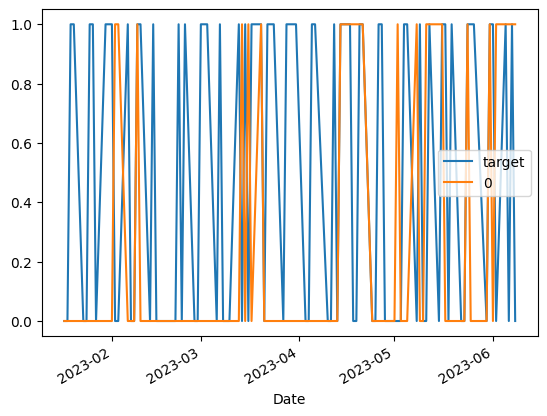

In [109]:
combined.plot()

In [110]:
def predict(train,test, predictors, model ):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['target'], preds], axis=1)
    return combined
    
    

In [111]:



# A backtest is a process in which a trading or investment strategy is evaluated 
# by applying it to historical data to simulate how it would have performed in the past.
# The purpose of a backtest is to assess the potential profitability and risk associated with
# a given strategy before applying it to real-time or future market conditions.

# In a backtest, historical data, such as price and volume, 
# is used to simulate the trading or investment decisions 
# that would have been made according to the strategy's rules. 
# The backtest typically involves iterating over the historical data, 
# equentially applying the strategy's rules at each point in time, 
# and tracking the simulated portfolio's performance.

# The key steps involved in a backtest are as follows:

# Data Selection: Determine the historical dataset to be used for the backtest, 
# which typically includes relevant market data like price, volume, and other indicators.

# Strategy Specification: Define the rules and parameters of 
# the trading or investment strategy, such as entry and exit criteria, 
# risk management techniques, position sizing, and any other relevant considerations.

# Simulation: Iterate over the historical data, applying the strategy's rules at each step 
# to determine the simulated trades, positions, and portfolio values. 
# Track performance metrics, such as profit and loss, returns, drawdowns, and risk measures.
# Evaluation: Analyze the results of the backtest to assess the strategy's performance, 
# including its profitability, risk characteristics, and other metrics of interest. 
# Compare the backtest results against benchmark indices or alternative strategies to provide context for the evaluation.
# Backtesting allows traders and investors to gain insights into how a strategy would have performed historically, 
# helping them to refine and optimize their approaches. However,
# it's important to note that backtests have limitations and assumptions, 
# as they rely on historical data and cannot guarantee future performance. 
# It's crucial to exercise caution, consider market dynamics, 
# and conduct thorough validation before deploying a strategy based solely on backtest results.







# next we create a backtest function which will have 10 years of data and 1 year
# step this means we take first 10 years data to train our model then we predict
# 11th year then we take 11 years and predict 12th and so on. 

def backtest(data, model, predictors, start=2500, step=250):
    # this will be a list of dataframe which is predictions of single years
    all_predictions = []
    
    # looping through all rows 
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i: (i+step)].copy()
        predictions = predict(train ,test, predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
        
    

In [112]:

# 1. Initialization:
#    - `all_predictions = []`: An empty list to store the predictions of each backtest iteration.

# 2. Loop iterations:
#    - Iteration 1:
#      - `i = 500`
#      - `train = data.iloc[0:500].copy()`: The training dataset consists of rows 0 to 499 (exclusive).
#      - `test = data.iloc[500:600].copy()`: The test dataset consists of rows 500 to 599 (exclusive).
#      - Predictions are made on `test` using the `predict` function and added to `all_predictions`.

#    - Iteration 2:
#      - `i = 600`
#      - `train = data.iloc[0:600].copy()`: The training dataset consists of rows 0 to 599 (exclusive).
#      - `test = data.iloc[600:700].copy()`: The test dataset consists of rows 600 to 699 (exclusive).
#      - Predictions are made on `test` using the `predict` function and added to `all_predictions`.

#    - Iteration 3:
#      - `i = 700`
#      - `train = data.iloc[0:700].copy()`: The training dataset consists of rows 0 to 699 (exclusive).
#      - `test = data.iloc[700:800].copy()`: The test dataset consists of rows 700 to 799 (exclusive).
#      - Predictions are made on `test` using the `predict` function and added to `all_predictions`.

#    - Iteration 4:
#      - `i = 800`
#      - `train = data.iloc[0:800].copy()`: The training dataset consists of rows 0 to 799 (exclusive).
#      - `test = data.iloc[800:900].copy()`: The test dataset consists of rows 800 to 899 (exclusive).
#      - Predictions are made on `test` using the `predict` function and added to `all_predictions`.

#    - Iteration 5:
#      - `i = 900`
#      - `train = data.iloc[0:900].copy()`: The training dataset consists of rows 0 to 899 (exclusive).
#      - `test = data.iloc[900:1000].copy()`: The test dataset consists of rows 900 to 999 (exclusive).
#      - Predictions are made on `test` using the `predict` function and added to `all_predictions`.

# 3. Return:
#    - `return pd.concat(predictions)`: The individual DataFrames in `all_predictions` are concatenated into a single DataFrame,
# using `pd.concat`. This concatenated DataFrame is then returned as the output of the `backtest` function.

# In summary, the `backtest` function splits the `data` DataFrame into multiple training and test sets,
# based on the specified `start` and `step` parameters. 
# It makes predictions on each test set using the provided model and predictor variables. 
# The function collects all the predictions in a list, concatenates them into a single DataFrame, 
# and returns the concatenated DataFrame as the output.

In [113]:
predictions = backtest(sp500, model, predictors)

In [114]:
# our predictions 
predictions["Predictions"].value_counts()

Predictions
0    3283
1    2641
Name: count, dtype: int64

In [115]:
# our presecion 
precision_score(predictions["target"], predictions["Predictions"])

0.5221507004922378

In [116]:
# real results, first one the natural days the stock went up second number days stock went down
# compared to our predictions our model is not good yet 

predictions["target"].value_counts() / predictions.shape[0]

target
1    0.533761
0    0.466239
Name: count, dtype: float64

In [128]:
# now we create different horizons to be able to see and compare the closing price over time.RandomForestClassifier
# we give our algorithm more information to help it make better predictions.

# rolling function creates a rolling window of a specified size 
# and performs calculations on each window, such as calculating the mean, sum, 
# or applying custom functions. 
# This allows you to analyze the data in a moving or rolling manner, 
# capturing trends and patterns over different subsets of the time series.

# so first it will compare todays close with the last two days 
# trend will tell us in currenct horizion the number of days that the stock went up.
# this will be achived usuing shift method we will shift forward one day then we will 
# find the rolling sum of the target.

horizons = [2,5,60,250, 1000, 1800]

new_predictiors = []

for h in horizons:
    rolling_average = sp500.rolling(h).mean()
    ratio_column = f"Close_ratio {h}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]
    
    trend_column = f"Trend {h}"
    sp500[trend_column] = sp500.shift(1).rolling(h).sum()["target"]
    
    new_predictiors += [ratio_column, trend_column]
    
# sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]: 
# This line calculates the ratio between the "Close" column and the rolling average for
# each corresponding row. It divides the "Close" column of the sp500 DataFrame 
# by the "Close" column of the rolling_average DataFrame and assigns the result 
# to the ratio_column in the sp500 DataFrame. This ratio represents the relative position 
# of the current price to the rolling average for the specific time horizon.



/var/folders/yz/hr50sfpj4clch5hvmb_9p78h0000gn/T/ipykernel_3988/1465710515.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]
/var/folders/yz/hr50sfpj4clch5hvmb_9p78h0000gn/T/ipykernel_3988/1465710515.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(h).sum()["target"]


In [118]:
sp500

,Open,High,Low,Close,Volume,tommorrow,target,Close_ratio 2,Trend 2,Close_ratio 5,Trend 5,Close_ratio 60,Trend 60,Close_ratio 250,Trend 250,Close_ratio 1000,Trend 1000,Close_ratio 1800,Trend 1800
Date,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-02 00:00:00-04:00,4241.009766,4290.669922,4241.009766,4282.370117,4454200000,4273.790039,0,1.007215,2.0,1.015059,4.0,1.047466,32.0,1.078206,116.0,1.137556,534.0,1.333509,971.0
2023-06-05 00:00:00-04:00,4282.990234,4299.279785,4266.819824,4273.790039,3813290000,4283.850098,1,0.998997,1.0,1.009754,3.0,1.043855,32.0,1.075880,115.0,1.134859,534.0,1.330323,971.0
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020,0,1.001176,1.0,1.008398,3.0,1.044517,33.0,1.078279,115.0,1.137109,534.0,1.332942,971.0


In [129]:
sp500.dropna()

,Open,High,Low,Close,Volume,tommorrow,target,Close_ratio 2,Trend 2,Close_ratio 5,Trend 5,Close_ratio 60,Trend 60,Close_ratio 250,Trend 250,Close_ratio 1000,Trend 1000,Close_ratio 1800,Trend 1800
Date,,,,,,,,,,,,,,,,,,,
2001-01-31 00:00:00-05:00,1373.729980,1383.369995,1364.660034,1366.010010,1295300000,1373.469971,1,0.997182,1.0,1.002007,2.0,1.015706,30.0,0.962106,121.0,1.144483,521.0,1.494570,974.0
2001-02-01 00:00:00-05:00,1366.010010,1373.500000,1359.339966,1373.469971,1118800000,1349.469971,0,1.002723,1.0,1.005126,3.0,1.021927,31.0,0.967499,122.0,1.150192,521.0,1.501900,975.0
2001-02-02 00:00:00-05:00,1373.469971,1376.380005,1348.719971,1349.469971,1048400000,1354.310059,1,0.991186,1.0,0.988355,3.0,1.005100,30.0,0.950793,122.0,1.129582,521.0,1.474862,974.0
2001-02-05 00:00:00-05:00,1349.469971,1354.560059,1344.479980,1354.310059,1013000000,1352.260010,0,1.001790,1.0,0.993334,3.0,1.009678,31.0,0.954439,122.0,1.133123,521.0,1.479354,974.0
2001-02-06 00:00:00-05:00,1354.310059,1363.550049,1350.040039,1352.260010,1059600000,1340.890015,0,0.999243,1.0,0.994964,2.0,1.008864,31.0,0.953154,122.0,1.130897,521.0,1.476320,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01 00:00:00-04:00,4183.029785,4232.430176,4171.640137,4221.020020,4391860000,4282.370117,1,1.004903,1.0,1.006774,4.0,1.033684,32.0,1.062945,115.0,1.121674,534.0,1.314913,971.0
2023-06-02 00:00:00-04:00,4241.009766,4290.669922,4241.009766,4282.370117,4454200000,4273.790039,0,1.007215,2.0,1.015059,4.0,1.047466,32.0,1.078206,116.0,1.137556,534.0,1.333509,971.0
2023-06-05 00:00:00-04:00,4282.990234,4299.279785,4266.819824,4273.790039,3813290000,4283.850098,1,0.998997,1.0,1.009754,3.0,1.043855,32.0,1.075880,115.0,1.134859,534.0,1.330323,971.0


In [130]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = RandomForestClassifier(n_estimators=250, min_samples_split=55, random_state=1)

In [131]:
# changing the function sligtly and usuing probability instead of 0 or 1
# then we set a threshold of 65% so our model is confident that if it says price will go up it is 
# 65% sure.
# it reduces our total number of trading days but instead it will increase the chance of if the 
# price will go up on predicted days. 
# we want to make more accurate trades than a lot of trades 


def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    preds[preds >= .58] = 1
    preds[preds < .58] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [133]:
sp500 = sp500.dropna()

In [134]:
# here we use new predictors because it contains more valuable infromation than our predicotrs
# example open price dosen't tell us much about wether price will go up or down tomorrow

predictions = backtest(sp500, model, new_predictiors)

In [135]:
predictions["Predictions"].value_counts()

Predictions
0.0    2384
1.0     739
Name: count, dtype: int64

In [136]:
precision_score(predictions["target"], predictions["Predictions"])

0.5277401894451962